In [1]:
import numpy as np
import gym
from collections import defaultdict
from tqdm import tqdm
import matplotlib.pyplot as plt

env = gym.make('Taxi-v2')

In [2]:
def epsilon_greedy(q, epsilon):
    if np.random.random() < epsilon:
        return np.random.randint(0, env.nA)
    else:
        return np.argmax(q)
        #return np.random.choice(np.where(q==max(q))[0])

def Q_learning(env, n_episodes, alpha, epsilon, gamma):
    
    Q = np.zeros([env.nS, env.nA])
    old_p = np.zeros([env.nS])
    old_Q = np.zeros([env.nS, env.nA])
    diff_p = []
    diff_Q = []
    rewards = []
    
    for i in tqdm(range(n_episodes)):
        env.reset()
        done = False
        total_reward = 0
        while not done:
            s = env.s
            a = epsilon_greedy(Q[s, :], epsilon)
            next_s, r, done, info = env.step(a)
            next_a = np.argmax(Q[next_s, :])
            Q[s,a] = (1-alpha) * Q[s,a] + alpha * (r + gamma * Q[next_s, next_a])
            total_reward = r + gamma * total_reward
        rewards.append(total_reward)

        p = np.argmax(Q, axis=1)
        diff_p.append(np.mean(np.abs(p-old_p)))
        old_p = np.copy(p)
        
        diff_Q.append(np.mean(np.abs(Q-old_Q)))
        old_Q = np.copy(Q)
        
    return Q, p, rewards, diff_p, diff_Q

In [44]:
env = gym.make('Taxi-v2')
#env = gym.make('FrozenLake-v0', desc=amap).unwrapped
gamma=0.9
alpha=0.2
epsilon=0.3
n_episodes=10000
seed = 741684
np.random.seed(seed)
env.seed(seed)
Q, p, rewards, diff_p, diff_Q = Q_learning(env, n_episodes, alpha, epsilon, gamma)

100%|██████████| 10000/10000 [00:05<00:00, 1935.96it/s]


In [48]:
Q[462,4]

-11.714700314046015

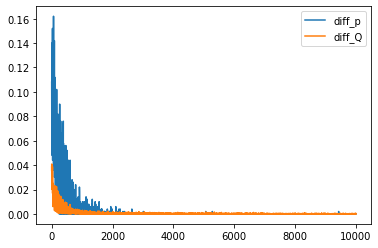

In [49]:
plt.plot(diff_p, label='diff_p')
plt.plot(diff_Q, label='diff_Q')
plt.legend()
plt.show()

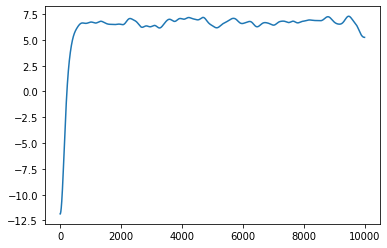

In [50]:
from scipy.ndimage.filters import gaussian_filter1d

y = gaussian_filter1d(rewards, sigma=100)
plt.plot(y)
plt.show()

In [80]:
done = False
env = gym.make('Taxi-v2')
env.reset()
while not done:
    env.render()
    s = env.s
    a = p[s]
    next_s, r, done, info = env.step(a)

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |